# ***🪗 Ritmin Ardındaki Başarı: Spotify Şarkı Özellikleri ile Popülerlik Skorunun Öngörülmesi 🎸​***

**📖​ Veri Setinin Hikayesi**

Bu veri seti, Spotify platformundan alınan çeşitli müzik parçalarının detaylı bilgilerini içermektedir. Veri seti, farklı türlerdeki (acoustic, afrobeat, alt-rock...) müzik parçalarının özelliklerini ve performans metriklerini barındırmaktadır.

Spotify'ın müzik öneri algoritmalarını geliştirmek, kullanıcı deneyimini iyileştirmek ve sanatçıların platformdaki performanslarını anlamak amacıyla bu tür veri setleri yaygın olarak kullanılmaktadır. Bizim analizimiz de bu tür bir amaçla, müzik parçalarının çeşitli özellikleri ile popülariteleri arasındaki ilişkiyi ortaya çıkarmayı hedeflemektedir.

**🎵 Spotify Veri Seti Özellikleri**

| **Değişken Adı** | **Açıklama**                                  | **Veri Türü**        | **Örnek Değerler / Açıklama**                               |
| ---------------- | --------------------------------------------- | -------------------- | ----------------------------------------------------------- |
| `id`             | Parçanın Spotify'daki benzersiz tanımlayıcısı | String               | `3n3Ppam7vgaVa1iaRUc9Lp`                                    |
| `name`           | Müzik parçasının adı                          | String               | `Shape of You`, `Blinding Lights`                           |
| `genre`          | Müzik türü / tarzı                            | Kategorik            | `acoustic`, `afrobeat`, `alt-rock`, vb. |
| `artists`        | Parçada yer alan sanatçı(lar)                 | String               | `Ed Sheeran`, `Drake, Future`, `BTS`                        |
| `album`          | Parçanın yer aldığı albüm adı                 | String               | `Divide`, `After Hours`                                     |
| `popularity`     | Parçanın popülarite skoru (0-100 arası)       | Sayısal (0–100)      | `0` = en az popüler, `100` = en popüler                     |
| `duration_ms`    | Parçanın süresi                               | Sayısal (milisaniye) | Örn: `210000` (3 dakika 30 saniye)                          |
| `explicit`       | Uygunsuz içerik bilgisi                       | Boolean              | `True` = küfürlü içerik var<br>`False` = yok                |


​**🎯 Hedef Değişken**​

Ana hedef değişkenimiz "popularity" olacaktır. Bu değişken, parçanın genel popülaritesini 0-100 arası bir skorla ifade etmektedir. Popülarite skoru tahmini için regresyon modelleri kullanacağız.

**💯 ​Projenin Potansiyel Faydaları**

Bu modelleme çalışmasıyla sağlanabilecek faydalar:

**1. Müzik Endüstrisi Profesyonelleri İçin:**
- Yeni çıkacak parçaların potansiyel popülaritesinin tahmin edilmesi

- Sanatçıların ve yapımcıların, hangi özelliklerin (tür, süre, vb.) popülariteyi olumlu etkilediğini anlaması

- Müzik yapım sürecinde veriye dayalı kararlar alınması

**2. Spotify ve Diğer Platformlar İçin:**

Daha iyi öneri sistemleri geliştirilmesi

- Kullanıcı beğenilerine uygun içeriklerin belirlenmesi

- Platform içi kişiselleştirme algoritmalarının iyileştirilmesi

**3. Müzik Dinleyicileri İçin:**

Kişiselleştirilmiş müzik keşif deneyimi

- Az bilinen ama dinleyicinin zevkine uygun parçaların keşfedilmesi

- Yeni müzik türlerinin keşfi

**4. Akademik ve Araştırma Amaçlı:**
- Müzik popülaritesini etkileyen faktörlerin bilimsel olarak incelenmesi

- Kültürel trendlerin müzik tercihleri üzerindeki etkisinin anlaşılması

- Müzik türleri arasındaki ilişkilerin ortaya çıkarılması



# **1. Veri Keşfi ve Ön İşleme**

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


In [2]:
# İmport İşlemleri

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from catboost import CatBoostRegressor
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight


from sklearn.metrics.pairwise import cosine_similarity
import joblib
from sklearn.neighbors import NearestNeighbors


In [3]:
# Veri Setinin Yüklenmesi

path = "/content/drive/MyDrive/Dataset/spotify_tracks (1).csv"
df = pd.read_csv(path)

In [4]:
# Veri Setinin İncelenmesi

df.head(10)

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
5,742ZnC1OgUGIScdzXEy5ui,Acoustic,acoustic,Ling tosite sigure,#4,14,238146,False
6,3vpJdk93GzerZnlou6Ua0z,Beautiful Things - Acoustic,acoustic,Benson Boone,Daydream,0,201248,False
7,42qGA2116mkpSAaxzQfjEf,Landslide,acoustic,"Guus Dielissen, Andrew Gialanella",Landslide,29,199222,False
8,0OHHcoyrWnkVukc911UeZd,Acoustic,acoustic,Sonido de Agua en Bambu,Agua,15,129250,False
9,64zEnxASl3epPAIH4MsmSw,Acoustic Energy Vibrations,acoustic,"Healing Solfeggio Frequencies, Harmony Touch",528: Mind & Body Healing,45,118331,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


Veri setimizde farklı tiplerde 8 adet değişken bulunmaktadır.

In [6]:
# Veri Seti Boyutu

print(f"Veri seti boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")

Veri seti boyutu: 6300 satır, 8 sütun


In [7]:
# Sütun isimleri

print("\nSütun isimleri:")
print(df.columns.tolist())


Sütun isimleri:
['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms', 'explicit']


In [8]:
# Temel istatistikler

print("\nSayısal değişkenlerin istatistikleri:")
display(df.describe().T)


Sayısal değişkenlerin istatistikleri:


,count,mean,std,min,25%,50%,75%,max
popularity,6300.0,30.754762,19.948991,0.0,16.0,29.0,45.0,90.0
duration_ms,6300.0,202847.735238,121029.858319,30060.0,147687.0,191607.0,236962.5,3601658.0


**📊 1. Popularity (Popülerlik Skoru)**

- Ortalama popülerlik skoru 30.75, bu da genel olarak şarkıların çok popüler olmadığını gösteriyor.

- Medyanın (29), ortalamaya yakın olması dağılımın çok dengesiz olmadığını gösterse de,

- Standart sapma (≈20) yüksek, yani popülerlik değerleri oldukça dağılmış.

- Minimum 0, maksimum 90; bu da veri setinde hem çok az dinlenen hem de oldukça popüler parçaların yer aldığını gösteriyor.

- 75%’lik dilim 45, yani şarkıların %75’i 45 puanın altında kalıyor → veri seti büyük ölçüde az/orta popüler şarkılardan oluşuyor.

**⏱ 2. Duration (Şarkı Süresi)**
- Ortalama şarkı süresi ~3 dakika 23 saniye, bu standart bir müzik süresi olarak kabul edilebilir.

- Standart sapma yüksek (121 saniye), yani şarkı sürelerinde büyük farklılıklar var.

- Maksimum süre 1 saatten fazla, bu sıradışı değer muhtemelen bir podcast, live set ya da hatalı veri olabilir (aykırı değer).

- Verinin %75’i 4 dakikanın altında → çoğu şarkı normal süreye sahip.

**📌 Genel Değerlendirme:**
- Popülerlik, çok değişken ve büyük oranda düşük skorlarda toplanmış.

- Süreler tipik müzik süresine uygun olsa da bazı aykırı değerler var (örneğin 1 saatlik kayıt).

- Veri setinde hem çok popüler olmayan hem de yüksek popülerliğe sahip parçalar yer alıyor.

- Süre değişkeninde aykırı gözlemler varsa model eğitimi öncesi kontrol edilmesi önemli olabilir.

In [9]:
# Veri tipleri

print("\nVeri tipleri:")
display(df.dtypes.to_frame(name='Data Type'))



Veri tipleri:


,Data Type
id,object
name,object
genre,object
artists,object
album,object
popularity,int64
duration_ms,int64
explicit,bool


In [10]:
# Benzersiz değer sayıları

print("\nBenzersiz değer sayıları:")
display(df.nunique().to_frame(name='Unique Counts'))


Benzersiz değer sayıları:


,Unique Counts
id,6187
name,4518
genre,126
artists,4651
album,4949
popularity,90
duration_ms,5566
explicit,2


| **Değişken Adı** | **Eşsiz Değer Sayısı** | **Yorum**                                                                                                                           |
| ---------------- | ---------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| `id`             | 6187                   | Neredeyse tüm satırlar benzersiz; bu beklenen bir durum çünkü `id` her şarkıya özel.                                                |
| `name`           | 4518                   | Aynı isimde (farklı sanatçılar tarafından) çıkan birçok şarkı olabilir. Veri çoğul isimleri içerebilir.                             |
| `genre`          | 126                    | Tür çeşitliliği yüksek.                             |
| `artists`        | 4651                   | Çok çeşitli sanatçılar yer alıyor. Tek şarkıda birden fazla sanatçı olduğu için bu alan karmaşık olabilir. Ayrıştırmak gerekebilir. |
| `album`          | 4949                   | Çok sayıda farklı albüm var. Albüm bilgisi modele doğrudan dahil edilmeyebilir, veya sadeleştirilebilir.                            |
| `popularity`     | 90                     | 0-100 arasında 90 farklı skor var; bu değişken sürekli gibi davranıyor ve **regresyon problemi için uygun**.                        |
| `duration_ms`    | 5566                   | Oldukça çeşitli süreler mevcut; modelde anlamlı olabilir. Aykırı değerler kontrol edilebilir.         |
| `explicit`       | 2                      | İkili değişken: `True` ve `False` var.                              |


In [11]:
# Eksik Değer Analizi

print("Eksik veri sayısı:")
missing_data = df.isnull().sum().to_frame(name='Missing Values')
missing_data['Percentage'] = round(missing_data['Missing Values'] / len(df) * 100, 2)
display(missing_data)

Eksik veri sayısı:


,Missing Values,Percentage
id,0,0.0
name,0,0.0
genre,0,0.0
artists,0,0.0
album,0,0.0
popularity,0,0.0
duration_ms,0,0.0
explicit,0,0.0


Veri setindeki değerler 'spotify 2021' verilerini içerdiği için eksik veri bulunmamaktadır.

**Aykırı Değer Analizi**


--- popularity Sütunu ---


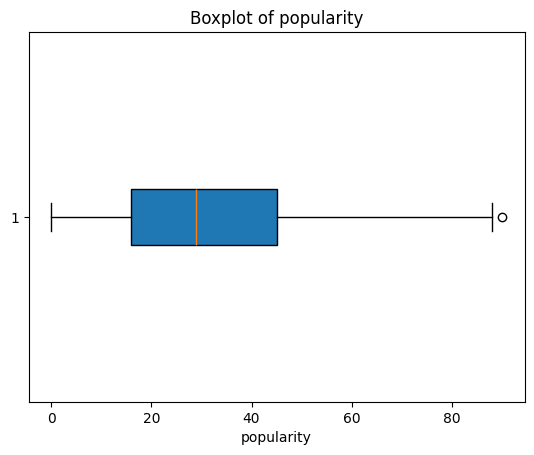

IQR: 29.0, Lower Bound: -27.5, Upper Bound: 88.5
Aykırı Değer Sayısı: 1


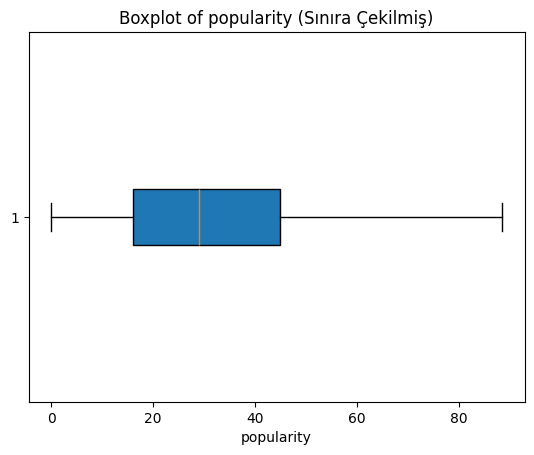


--- duration_ms Sütunu ---


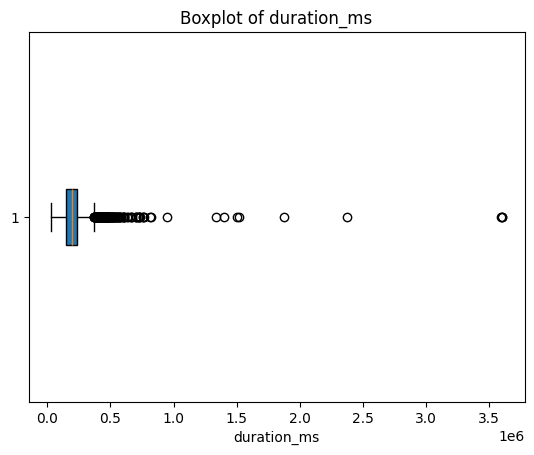

IQR: 89275.5, Lower Bound: 13773.75, Upper Bound: 370875.75
Aykırı Değer Sayısı: 236


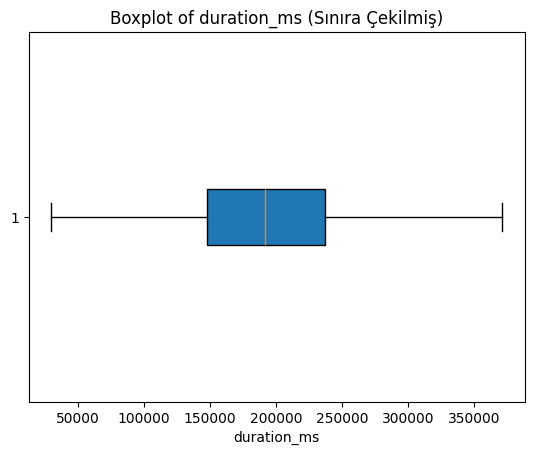

In [12]:
numeric_columns = ['popularity', 'duration_ms']
for col in numeric_columns:
    print(f"\n--- {col} Sütunu ---")

    # Boxplot ile aykırı değerleri görselleştir
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # IQR yöntemi ile aykırı değer analizi
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Aykırı Değer Sayısı: {len(outliers)}")


    # Aykırı değerleri sınıra çek
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Sınıra çekilmiş veriyi tekrar görselleştir
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Sınıra Çekilmiş)")
    plt.xlabel(col)
    plt.show()

***popularity***
- 'popularity' değişkeni 0–100 arası sınırlı bir aralıkta.

- %0.02 gibi çok düşük bir oranda aykırı değer olması, bu değişken için modeli bozacak düzeyde bir önem arz etmiyor.

- Modeli bozma ihtimali çok düşük fakat modeli en ufak düzeyde bile kötü etkileme ihtimali olduğundan sınıra çekebiliriz.

***duration_ms***
- Bu oran yüksek (%3.75) olduğu için model performansına olumsuz etki edebilir.

- Örneğin 3.6 milyon ms’lik (yaklaşık 1 saat) bir şarkı, aslında podcast, mix veya hata kaynaklı olabilir.

- Bu durumda 'duration_ms' değişkenindeki aykırı değerler silindiğinde veri kaybına neden olacağı için, aykırı değerlerin sınıra çekilmesi daha mantıklı olabilir.

**Kategorik Değişkenlerin Dağılımı**


genre değişkeni dağılımı:


,Count
genre,
acoustic,50
afrobeat,50
alt-rock,50
alternative,50
ambient,50
...,...
trance,50
trip-hop,50
turkish,50


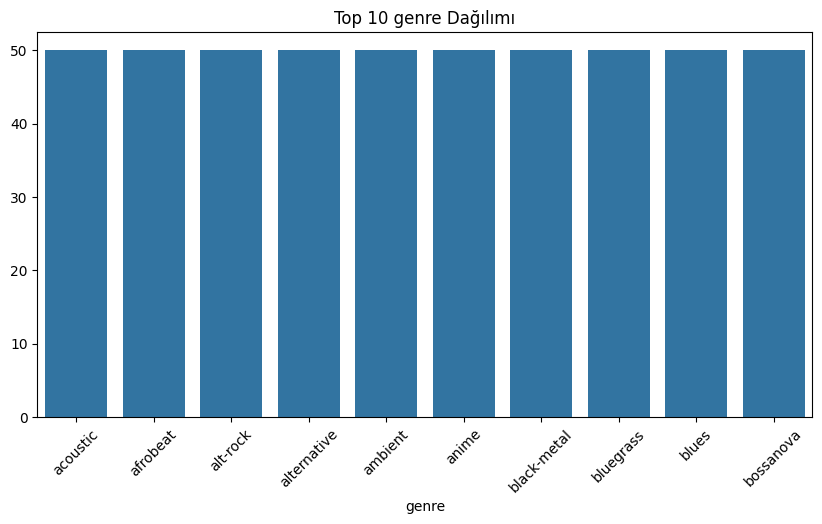


explicit değişkeni dağılımı:


,Count
explicit,
False,5106
True,1194


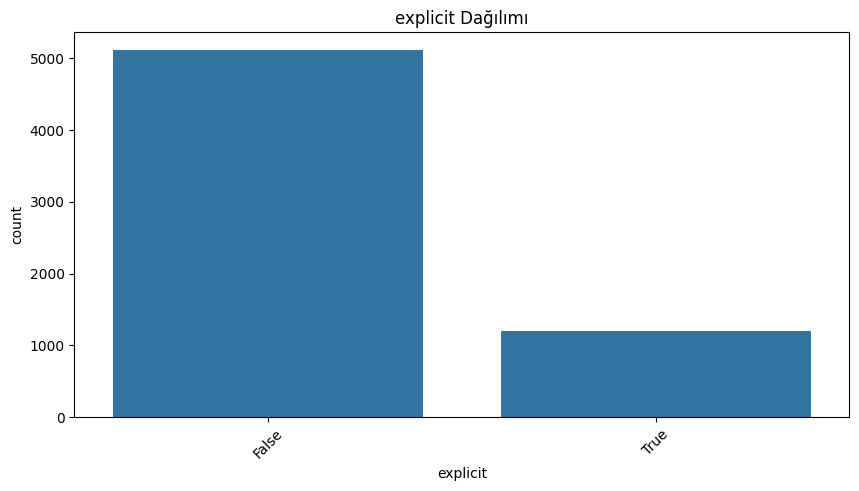


album değişkeni dağılımı:


,Count
album,
Bach & Friends,20
Organic Passion,18
Face For The Radio/Voice For A Silent Film (Deluxe),17
Detroit Afterparty,16
100 Greatest Bluegrass Hits,15
...,...
17 Year Bender,1
"It Only Gets Worse/Swollen, Limping and Inflamed",1
Rock: Alternative 2,1


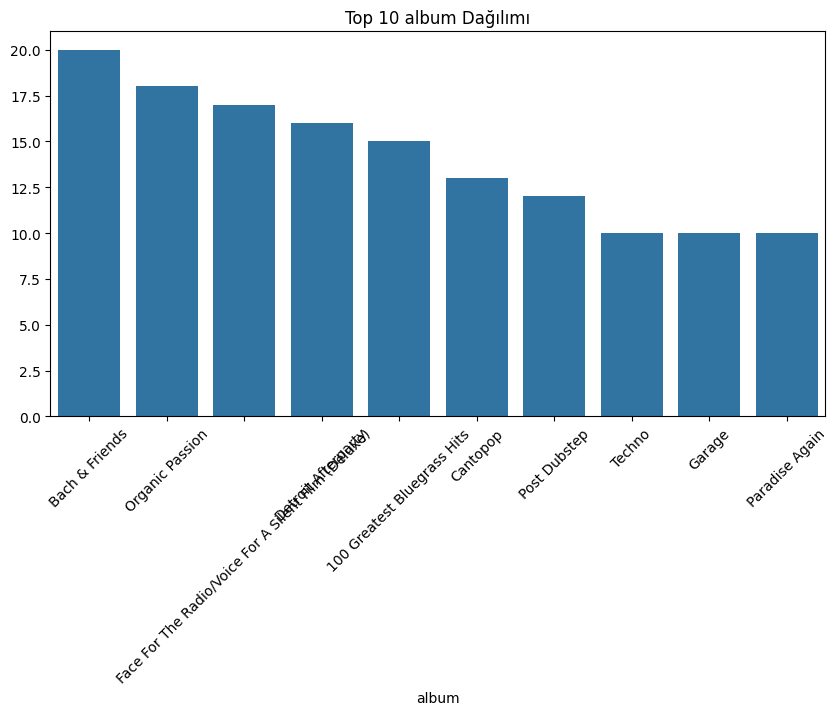


artists değişkeni dağılımı:


,Count
artists,
Metallica,22
ONE OK ROCK,20
Chicago House Selection,18
Death,17
Progressive House Sessions,16
...,...
Jerry Reed,1
Emotioal Piano,1
Tommy Berre,1


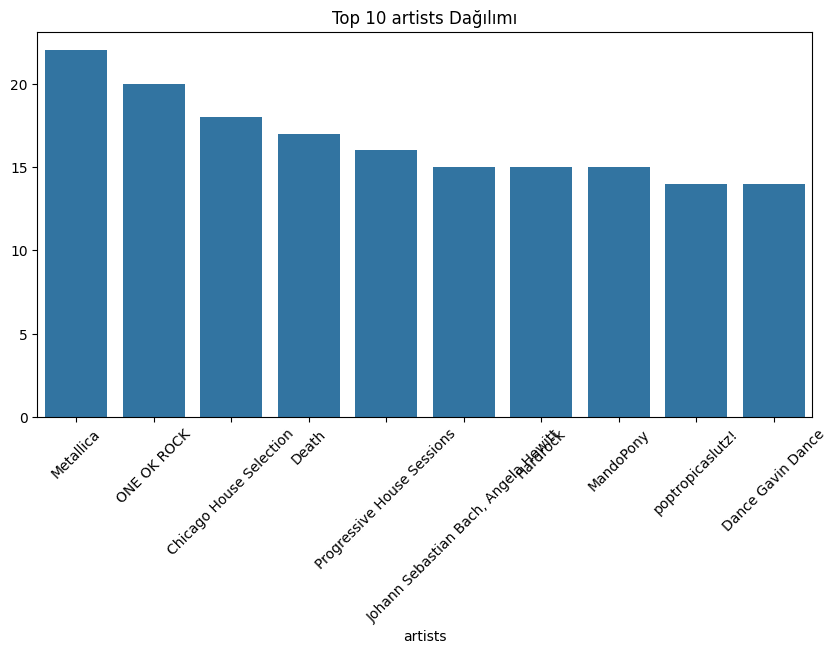

In [13]:
cat_cols = ['genre', 'explicit', 'album', 'artists']

for col in cat_cols:
    print(f"\n{col} değişkeni dağılımı:")
    display(df[col].value_counts().to_frame(name='Count'))

    # Görselleştirme
    plt.figure(figsize=(10,5))
    if df[col].nunique() > 10:  # Eğer çok fazla kategori varsa en çok olanları göster
        top_cats = df[col].value_counts().nlargest(10)
        sns.barplot(x=top_cats.index, y=top_cats.values)
        plt.title(f'Top 10 {col} Dağılımı')
    else:
        sns.countplot(x=df[col])
        plt.title(f'{col} Dağılımı')
    plt.xticks(rotation=45)
    plt.show()

**​🎵 ​'Genre (Tür)' Dağılımı**
- Türler eşit dağılmış, bu da modelimiz için olumlu bir durum.

**​🎵 ​'​Explict (Sansür)' Dağılımı**
- False: 5106
- True: 1194
- Oran: %81 temiz içerik / %19 sansürlü içerik
- Veri belirgin şekilde dengesiz.

**​🎵 ​'Album' Dağılımı**,
- Veri setinde yüzlerce albüm bulunuyor, ve bunlardan bazıları genellikle 1-2 örnek içeriyor.
- Bu kadar fazla kategorik değişkenin bulunması model performansını olumsuz etkileyebilir.

**​🎵 ​'Artists' Dağılımı'**
- 'Album' değişkenine benzer şekilde çok fazla sanatçı bulunuyor fakat bunlardan çoğu birkaç kez geçiyor.
- Dolayısıyla direkt olarak 'Artists' sütununu modele vermek istenilmeyen durumlara yol açabilir.
- Özellik mühendisliği kapsamında bu sütunlardan yola çıkılarak yeni özellikler türetilebilir.


**Duration Değişkeninin Dağılımı**

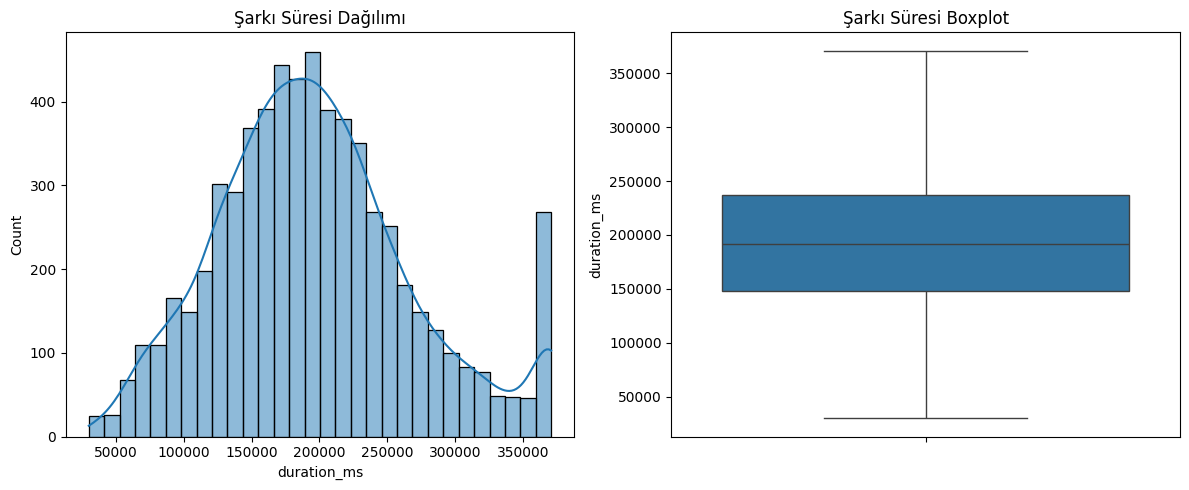

In [14]:
# Süre dağılımı

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['duration_ms'], bins=30, kde=True)
plt.title('Şarkı Süresi Dağılımı')

plt.subplot(1,2,2)
sns.boxplot(y=df['duration_ms'])
plt.title('Şarkı Süresi Boxplot')
plt.tight_layout()
plt.show()


📊**Histogram**
- Dağılım çan eğrisine yakın, yaklaşık normal dağılım gibi görünüyor ama:

- Sağ kuyrukta hafif uzama var, muhtemelen podcast tarzı bir içerik olabilir.

- En yoğun şarkı süresi aralığı 150.000 – 250.000 ms arasında (yaklaşık 2,5 – 4 dakika).

- Çok uzun veya çok kısa şarkılar az sayıda.

📊 **Boxplot**
- Uç değerler mevcut olsa da aykırı değerler bulunmuyor.

**Popülarite Değişkeninin Dağılımı**

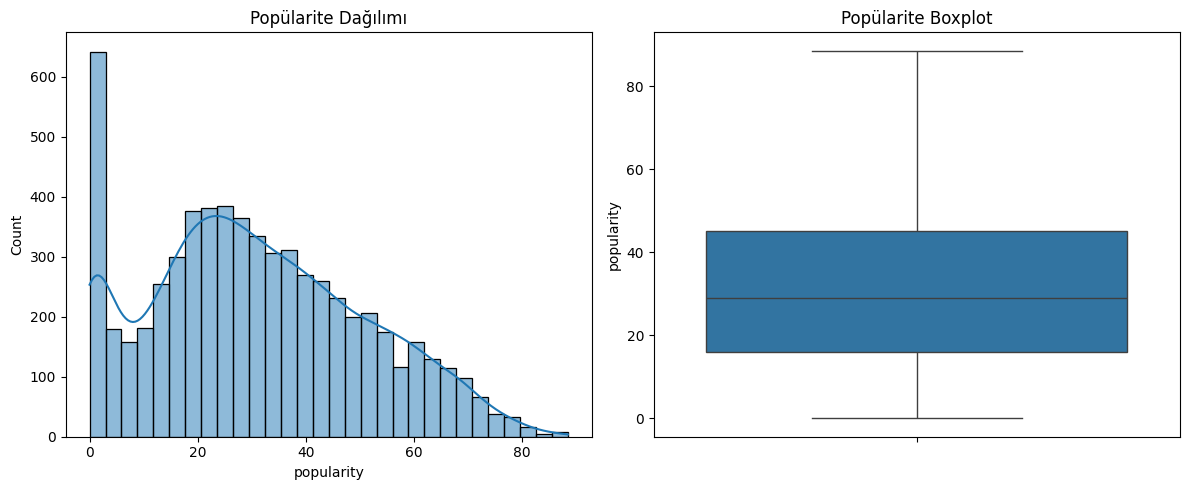

In [15]:
# Popülarite dağılımı

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Popülarite Dağılımı')

plt.subplot(1,2,2)
sns.boxplot(y=df['popularity'])
plt.title('Popülarite Boxplot')
plt.tight_layout()
plt.show()

**📊 Histogram**
- Grafiği incelediğimizde sağa çarpık-sola yığılmış- bir grafik olduğunu görüyoruz.
- Şarkıların popülarite yoğunluğu yaklaşık 20-30 oranında gözüküyor.
- Popülerlik skoru 0 olan şarkı sayısı oldukça fazla gözükmektedir.

 📊**Boxplot**
- Aykırı değer bulunmuyor.


# **2. Popülerlik Analizi: Türler, Albümler ve İçerik Yapısına Göre Top 3**

/tmp/ipython-input-16-1307928201.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='genre', data=popularity_by_genre, palette='viridis')


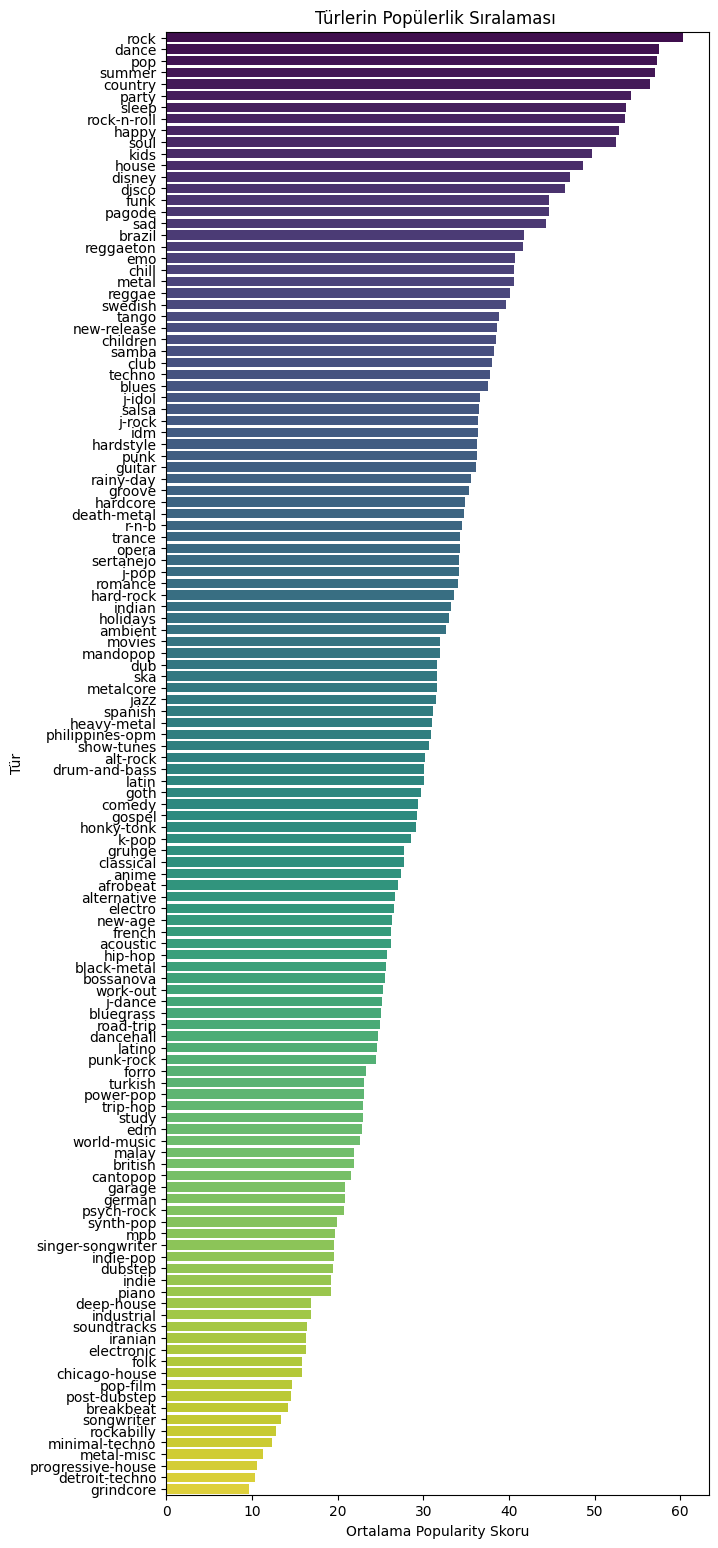

In [16]:
# Türler Arası Popülerlik Sıralaması
popularity_by_genre = df.groupby('genre')['popularity'].mean().reset_index()
popularity_by_genre = popularity_by_genre.sort_values('popularity', ascending=False)

# Görselleştirme
plt.figure(figsize=(7, 19))
sns.barplot(x='popularity', y='genre', data=popularity_by_genre, palette='viridis')
plt.title('Türlerin Popülerlik Sıralaması ')
plt.xlabel('Ortalama Popularity Skoru')
plt.ylabel('Tür')
plt.show()

**🎼 En Popüler 3 Tür (Genre)**

genre
rock     60.34
dance    57.52
pop      57.32
Name: popularity, dtype: float64


/tmp/ipython-input-17-4041767640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_df, x="genre", y="popularity", palette="viridis")


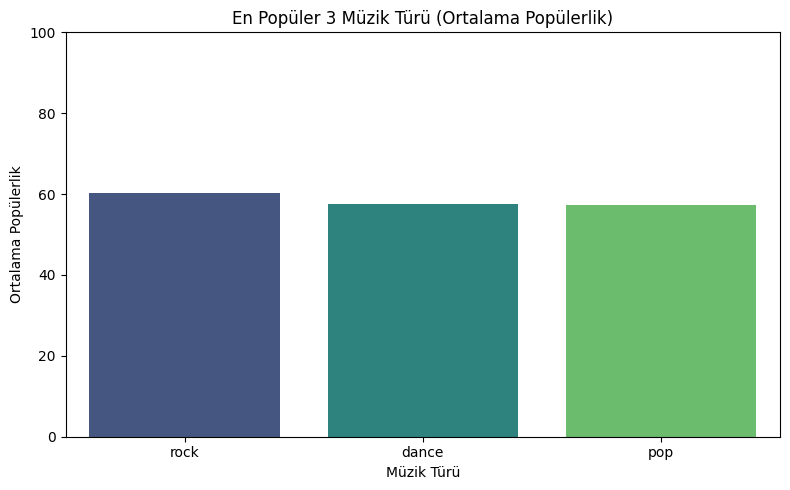

In [17]:
# En popüler 3 Tür
top_genres = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(3)
print(top_genres)

top_genres_df = top_genres.reset_index()
top_genres_df.columns = ['genre', 'popularity']


# Görselleştirme

plt.figure(figsize=(8, 5))

sns.barplot(data=top_genres_df, x="genre", y="popularity", palette="viridis")

plt.title("En Popüler 3 Müzik Türü (Ortalama Popülerlik)")
plt.xlabel("Müzik Türü")
plt.ylabel("Ortalama Popülerlik")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

***Top 3***

**1- Rock (60.34)**

**2- Dance (57.52)**

**3- Pop (57.32)**

**💿 En Popüler 3 Albüm**

album
Houdini                               88.5
Best White Noise For Sleeping Baby    88.0
Harry's House                         87.0
Name: popularity, dtype: float64


/tmp/ipython-input-18-2714198161.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_albums_df, x="album", y="popularity", palette="viridis")


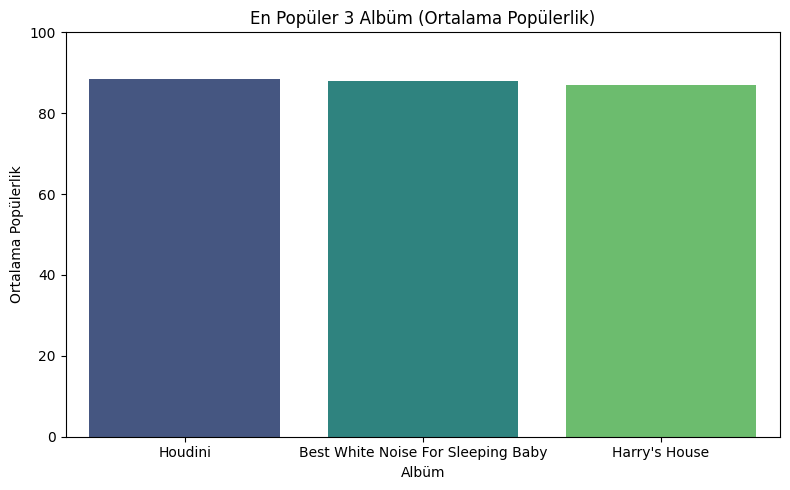

In [18]:
# En Popüler 3 Albüm

top_albums = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(3)
print(top_albums)

top_albums_df = top_albums.reset_index()
top_albums_df.columns = ['album', 'popularity']

# Görselleştirme

plt.figure(figsize=(8, 5))

sns.barplot(data=top_albums_df, x="album", y="popularity", palette="viridis")

plt.title("En Popüler 3 Albüm (Ortalama Popülerlik)")
plt.xlabel("Albüm")
plt.ylabel("Ortalama Popülerlik")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

***Top 3***

**1- Houdini (88.5)**

**2- Best White Noise For Sleeping Baby (88.0)**

**3- Harry's House (87.0)**

**🚫 Sansürlü / Sansürsüz Şarkılarda Ortalama Popülerlik Karşılaştırması**

explicit
False    30.073639
True     33.666248
Name: popularity, dtype: float64


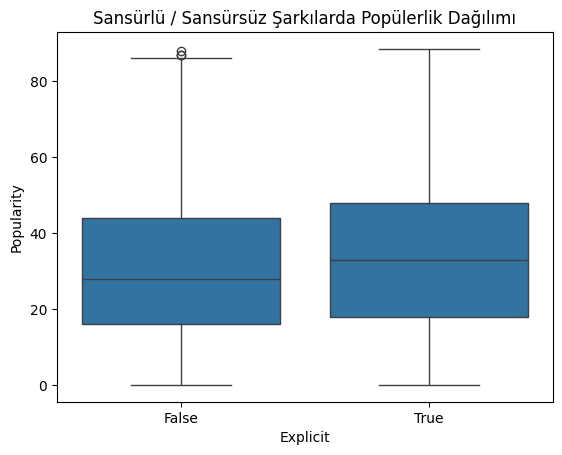

In [19]:
# Explicit Durumuna Göre Ortalama Popülerlik Skoru

explicit_comparison = df.groupby('explicit')['popularity'].mean()
print(explicit_comparison)

# Görselleştirme

sns.boxplot(x='explicit', y='popularity', data=df)
plt.title("Sansürlü / Sansürsüz Şarkılarda Popülerlik Dağılımı")
plt.xlabel("Explicit")
plt.ylabel("Popularity")
plt.show()

**Sansürlü İçerik -> 33.66**

**Sansürsüz İçerik -> 30.07**

 **KORELASYON MATRİSİ**

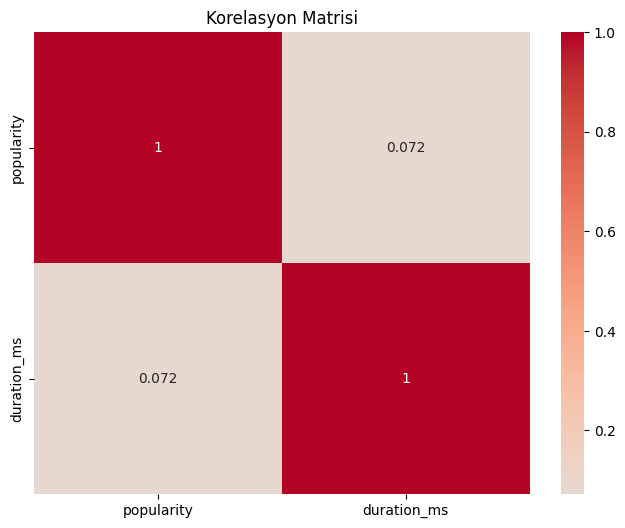

In [20]:
# 'popularity' & 'duration_ms' Korelasyon Matrisi

corr_matrix = df[['popularity', 'duration_ms']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi')
plt.show()

- Korelasyon katsayısı= **0.072**
- Pozitif yönlü fakat çok zayıf bir ilişki mevcut.
- Yani şarkının süresi uzadıkça popüler olma ihtimali çok hafif artıyor olabilir ama bu ilişki neredeyse yok sayılabilir düzeyde.
- Bu iki değişken arasında doğrusal bir ilişki yok; biri artarken diğeri net şekilde artmıyor veya azalmıyor diyebiliriz.
- 'duration_ms' değişkeni, tek başına popülerliği tahmin etmede güçlü bir etken değildir.



# **3. Feature Engineering**

In [21]:
# Özellik mühendisliğine geçmeden orijinal dataframe'in bir kopyasını bulundurmakta fayda var.
df_bfe_copy = df.copy()

**🧑🏼‍🎤 'artists' Sütunu İçin**

In [22]:
# 'artist_count' -> Parçadaki Sanatçı Sayısı
df['artist_count'] = df['artists'].apply(lambda x: len(x.split(',')))

# 'main_artist' -> Ana Sanatçı
df['main_artist'] = df['artists'].apply(lambda x: x.split(',')[0].strip())

# 'artist_freq' -> Ana Sanatçının Parça Sayısı
main_artist_counts = df['main_artist'].value_counts()
df['artist_freq'] = df['main_artist'].map(main_artist_counts)

**1.** **'artist_count'** → Parçadaki Sanatçı Sayısı
  - Parçada kaç adet sanatçı bulunduğunu sayıyor.
  - Örnek olarak;
      - "Drake" → 1
      - "Drake, Future" → 2
      - "Beyonce, Jay-Z, Kendrick Lamar" → 3

**2.** **'main_artist'** → Ana Sanatçı
- Birden fazla sanatçı varsa, sadece ilk sıradaki sanatçıyı alıyor.

*Neden ilk sıradaki sanatçı ?*
- Spotify'da şarkı listesinde ilk görünen kişi genellikle ana sanatçıdır, "feat." ile yazılanlar konuk sanatçılardır.
- Yani; "Drake, Future" -> 'main_artist' -> 'Drake'

**3. 'artist_freq'** → Ana sanatçının Parça Sayısı
- Ana sanatçının veri setinde kaç adet parçasının bulunduğunu hesaplar.




**💿 'album' Sütunu İçin**

In [23]:
# Albümdeki Parça Sayısı
album_counts = df['album'].value_counts()
df['album_freq'] = df['album'].map(album_counts)


- Yeni eklenen bu özellikle beraber 'Popüler Albümler Daha Fazla Parça İçerir mi?' sorusunun cevabını görmeyi hedefledik.

- Albümdeki parça sayısı şarkının popülerliğini olumlu/olumsuz etkileyebilir.





**⏳ 'duration_ms' Sütunu İçin**

In [24]:
# Milisaniye Cinsini Dakikaya Çevirme
df['duration_min'] = df['duration_ms'] / 60000


 - Şarkı süresinin dakika cinsine çevrilmesi modelin eğitilmesi ve yorumlanması için daha kolay olabilir.

**🎷'genre' Sütunu İçin**

In [25]:
# Ana Türleri Belirleme
df['main_genre'] = df['genre'].apply(lambda x: x.split(',')[0].strip() if ',' in x else x)

# Tür Popülerlik Skoru
genre_popularity = df.groupby('main_genre')['popularity'].mean().to_dict()
df['genre_popularity'] = df['main_genre'].map(genre_popularity)



- **'main_genre'->** Bazı şarkılar birden fazla türde etiketlenmiş olabileceği için ilk sıradaki ana kategoriyi alarak daha verimli bir etiketleme sağlanmış olur.

- **'genre_popularity'->** Her türün ortalama popülerlik skorunu hesaplayarak tür değşkenini sayısal bir değere dönüştürmüş olur.



In [26]:
df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'artist_count', 'main_artist', 'artist_freq', 'album_freq',
       'duration_min', 'main_genre', 'genre_popularity'],
      dtype='object')

In [27]:
df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit,artist_count,main_artist,artist_freq,album_freq,duration_min,main_genre,genre_popularity
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58.0,172199.0,False,1,Billy Raffoul,4,1,2.869983,acoustic,26.28
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57.0,172202.0,False,1,Billy Raffoul,4,1,2.870033,acoustic,26.28
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42.0,144786.0,False,2,Molly Hocking,1,1,2.413100,acoustic,26.28
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46.0,116573.0,False,1,The Goo Goo Dolls,1,1,1.942883,acoustic,26.28
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33.0,133922.0,False,2,Guus Dielissen,2,1,2.232033,acoustic,26.28


**Özellik Mühendisliği Kapsamında Gereksiz Sütunların Çıkartılması**

Eski Sütunlar Neden Silinmeli ?
- Yeni oluşturulan sütunlar zaten eski sütunlardan türetildi.
- Orijinal sütunlar bu bağlamda veri tekrarını tetikleyebileceği için gürültüyü önlemek adına silinebilir.
- Birbiri ile yüksek benzerlik içeren sütunlar overfitting riskini arttırabilir.
- Gereksiz değişkenler çıkartılarak model daha sade ve yorumlanabilir hale gelir.


In [28]:
# Gereksiz Sütunların Silinmesi

columns_to_drop = ['id','name','genre', 'artists', 'album']
df.drop(columns=columns_to_drop, inplace=True)

In [29]:
df.drop(columns=['duration_ms'], inplace=True)

In [30]:
# Veri setinin güncel hali bu şekilde.
df_afe_copy = df.copy()
df.head()

,popularity,explicit,artist_count,main_artist,artist_freq,album_freq,duration_min,main_genre,genre_popularity
0,58.0,False,1,Billy Raffoul,4,1,2.869983,acoustic,26.28
1,57.0,False,1,Billy Raffoul,4,1,2.870033,acoustic,26.28
2,42.0,False,2,Molly Hocking,1,1,2.413100,acoustic,26.28
3,46.0,False,1,The Goo Goo Dolls,1,1,1.942883,acoustic,26.28
4,33.0,False,2,Guus Dielissen,2,1,2.232033,acoustic,26.28


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        6300 non-null   float64
 1   explicit          6300 non-null   bool   
 2   artist_count      6300 non-null   int64  
 3   main_artist       6300 non-null   object 
 4   artist_freq       6300 non-null   int64  
 5   album_freq        6300 non-null   int64  
 6   duration_min      6300 non-null   float64
 7   main_genre        6300 non-null   object 
 8   genre_popularity  6300 non-null   float64
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 400.0+ KB


# **4. Encoding**

In [32]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("🟩 Explicit İlk 10 Değer:\n", df['explicit'].head(10), "\n")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("🟩 Main Genre İlk 10 Değer:\n", df['main_genre'].head(10), "\n")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("🟩 Main Artist İlk 10 Değer:\n", df['main_artist'].head(10))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
🟩 Explicit İlk 10 Değer:
 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: explicit, dtype: bool 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
🟩 Main Genre İlk 10 Değer:
 0    acoustic
1    acoustic
2    acoustic
3    acoustic
4    acoustic
5    acoustic
6    acoustic
7    acoustic
8    acoustic
9    acoustic
Name: main_genre, dtype: object 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
🟩 Main Artist İlk 10 Değer:
 0                    Billy Raffoul
1                    Billy Raffoul
2                    Molly Hocking
3                The Goo Goo Dolls
4                   Guus Dielissen
5               Ling tosite sigure
6                     Benson Boone
7                   Guus Dielissen
8          Sonido de Agua en Bambu
9    Healing Solfeggio Frequencies
Name: main_artist, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~

In [33]:
# 'explict' Label -> Encoding
le = LabelEncoder()
df['explicit_encoded'] = le.fit_transform(df['explicit'])

In [34]:
# 'main_genre' -> Target Encoding
genre_target = df.groupby('main_genre')['popularity'].mean().to_dict()
df['main_genre_popularity_encoded'] = df['main_genre'].map(genre_target)

'main_genre' ile 'popularity' ortalamasını alıp target encoding yöntemini tercih ettik, çünkü 'main_genre' sütununda çok fazla sayıda unique değer mevcuttu, bu da veri gürültüsüne sebep olabilir.

In [35]:
# 'main_artist' -> Frequency Encoding
artist_freq = df['main_artist'].value_counts(normalize=True).to_dict()
df['main_artist_encoded'] = df['main_artist'].map(artist_freq)

In [36]:
df.head()

,popularity,explicit,artist_count,main_artist,artist_freq,album_freq,duration_min,main_genre,genre_popularity,explicit_encoded,main_genre_popularity_encoded,main_artist_encoded
0,58.0,False,1,Billy Raffoul,4,1,2.869983,acoustic,26.28,0,26.28,0.000635
1,57.0,False,1,Billy Raffoul,4,1,2.870033,acoustic,26.28,0,26.28,0.000635
2,42.0,False,2,Molly Hocking,1,1,2.413100,acoustic,26.28,0,26.28,0.000159
3,46.0,False,1,The Goo Goo Dolls,1,1,1.942883,acoustic,26.28,0,26.28,0.000159
4,33.0,False,2,Guus Dielissen,2,1,2.232033,acoustic,26.28,0,26.28,0.000317


In [37]:
# 'explicit',	'main_artist', 'main_genre', 'main_genre_popularity_encoded' Sütunlarının Silinmesi
df.drop(columns=['explicit', 'main_artist', 'main_genre','main_genre_popularity_encoded' ], inplace=True)
df.head()

,popularity,artist_count,artist_freq,album_freq,duration_min,genre_popularity,explicit_encoded,main_artist_encoded
0,58.0,1,4,1,2.869983,26.28,0,0.000635
1,57.0,1,4,1,2.870033,26.28,0,0.000635
2,42.0,2,1,1,2.413100,26.28,0,0.000159
3,46.0,1,1,1,1.942883,26.28,0,0.000159
4,33.0,2,2,1,2.232033,26.28,0,0.000317


In [38]:
df.drop(columns=['artist_freq'], inplace=True)

*🗑️Bu Sütunlar Neden Silindi ?*
- ***explict :*** Encode işlemi sonrası 'True' & 'False' olan değerler '0' & '1' olarak dönüştürüldü, ve boolean olan 'explict' sütunu silinerek yerine int64 olan 'explicit_encoded' geldi.
- ***main_artist :*** Encode işlemi sonrası object olan 'main_artist' sütunu yerini float64 olan 'main_artist_encoded' sütununa bıraktı.
- ***'main_genre' & 'main_genre_popularity_encoded' :*** Bu iki değişken özellik mühendisliği kapsamında oluşturduğumuz 'genre_popularity' sütunu ile aynı amaca hizmet ettiği için modelin öğrenmesine yönelik bir katkısı bulunmuyordu. Bu yüzden veri tekrarını önlemek adına modelden çıkartıldı.
- ***'artist_freq' :*** 'main_artist_encoded' sütunu ile encode edilmiştir.

In [39]:
# Veri setindeki değişkenlerin güncel type'ları
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   popularity           6300 non-null   float64
 1   artist_count         6300 non-null   int64  
 2   album_freq           6300 non-null   int64  
 3   duration_min         6300 non-null   float64
 4   genre_popularity     6300 non-null   float64
 5   explicit_encoded     6300 non-null   int64  
 6   main_artist_encoded  6300 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 344.7 KB


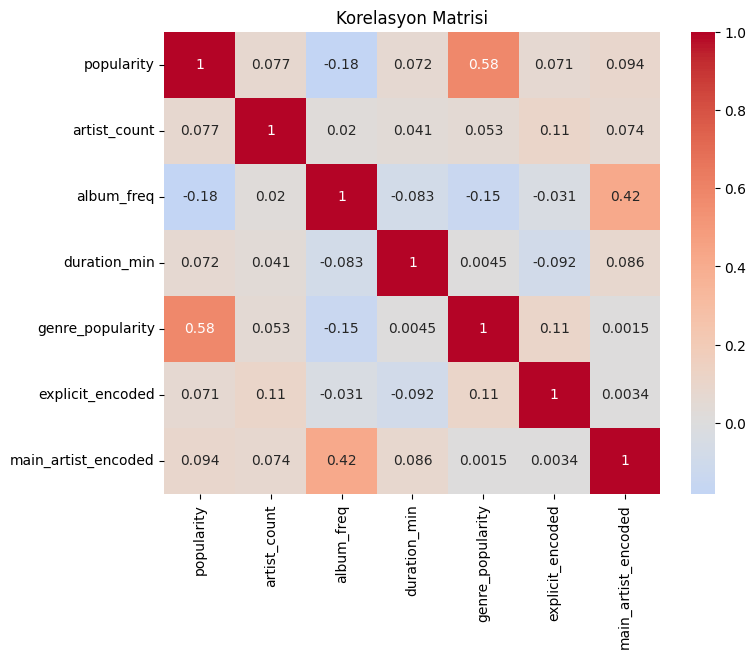

In [40]:
numeric_columns = ['popularity', 'artist_count', 'album_freq', 'duration_min', 'genre_popularity','explicit_encoded','main_artist_encoded']
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi')
plt.show()

| Özellik               | Korelasyon | Yorum                                                                                                     |
| --------------------- | ---------- | --------------------------------------------------------------------------------------------------------- |
| `genre_popularity`    | **0.58**   | En güçlü pozitif ilişki. Türün ortalama popülerliği şarkının popülerliğini doğrudan etkiliyor.         |
| `main_artist_encoded` | **0.094**      | Çok zayıf ama pozitif ilişki. Sanatçının veri setindeki yaygınlığı, biraz etkili.                         |
| `artist_count`        | **0.077**      | Zayıf ilişki. Daha fazla sanatçı varsa popülerlik az da olsa artıyor olabilir.                            |
| `duration_min`        | **0.072**      | Neredeyse sıfıra yakın ,şarkı süresi popülerliği pek etkilemiyor.                                        |
| `explicit_encoded`    | **0.071**      | Çok zayıf pozitif ilişki, sansürlü içerik popülerliği bir miktar artırıyor olabilir.                                   |
| `album_freq`          | **-0.18**  | Negatif ilişki var: Çok parçalı albümlerdeki parçalar genelde daha az popüler olabilir. |


**Random Forest ile Özellik Önem Skoru**

/tmp/ipython-input-41-629255119.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='pastel')


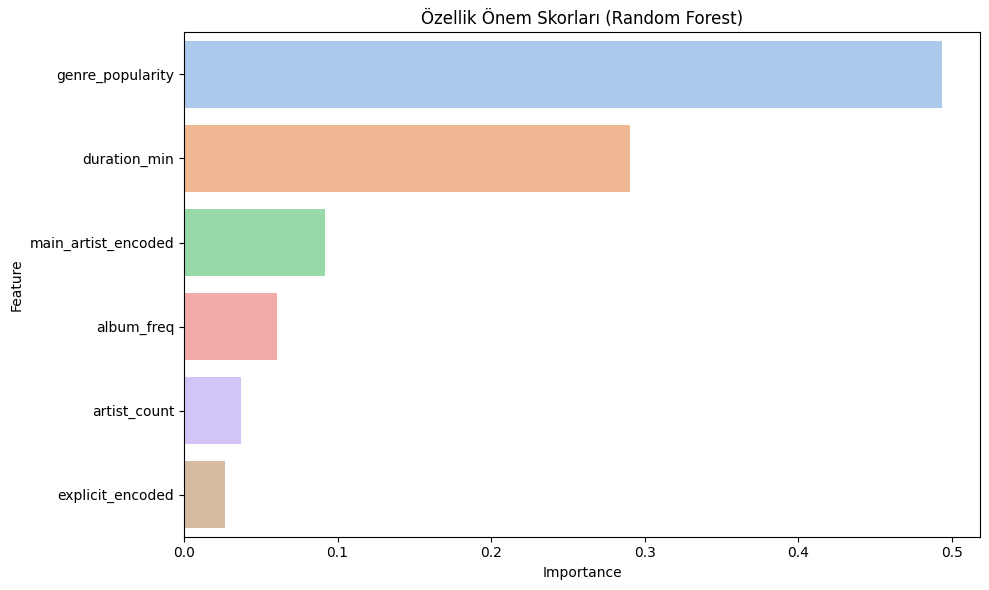

In [41]:
# Özellikler ve hedef
X = df.drop(['popularity'], axis=1)
y = df['popularity']

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Özellik önem skorları
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='pastel')
plt.title("Özellik Önem Skorları (Random Forest)")
plt.tight_layout()
plt.show()

**VIF Skoru**

In [42]:
# VIF Skoru Hesaplama

X = df[['duration_min', 'artist_count', 'album_freq','explicit_encoded', 'main_artist_encoded', 'genre_popularity']]
X_const = add_constant(X)

vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

               Feature        VIF
0                const  19.686712
1         duration_min   1.037119
2         artist_count   1.021622
3           album_freq   1.268381
4     explicit_encoded   1.033658
5  main_artist_encoded   1.245835
6     genre_popularity   1.039590


Tüm değişkenlerin VIF değeri 2'den küçük olduğu için Multikolinerlik kesinlikle yok diyebiliriz, Bu da modelimizin overfitting riskini büyük ölçüde önler.

# **5. Standartlaştırma**

**Standartlaştırma hangi değişkenler için gerekli ?**


✅ ​**'duration_min' :** Süresi dakika cinsinden olan bu değişken, regresyon modelinde ağırlıklı değişiklik yaratabileceği için standartlaştırılmalıdır.

✅ ​**'artist_count' :** Sanatçı sayısı farklı aralıklarda değer alabildiği için modelin katsayılarını dengede tutmak adına standartlaştırılmalıdır.

✅ ​**'album_freq' :** Albümdeki parça sayısı geniş aralıklara sahip olabileceğinden, modelin bu veriye orantısız tepki vermemesi için ölçeklenmelidir.

❌​ **'explicit_encoded' :** Bu bir binary sütun (0/1) olduğu için standartlaştırma uygulanırsa anlamsal bütünlüğünü kaybeder.

❌ **'main_artist_encoded' :** Bu sütuna frequency encoding uygulandığı için yeniden ölçeklemeye gerek yoktur.

❌ **'main_genre_encoded' :** Türlerin veri setindeki oranlarıdır ve zaten 0–1 arasında normalize edilmiş olduklarından standartlaştırılmamalıdır.



In [43]:
# Standartlaştırma işlemine geçmeden önce bir kopya oluşturalım.
df_before_scaling = df.copy()

In [44]:
# Standartlaştırılacak Sütunları Seçelim
columns_to_scale = ['duration_min', 'artist_count', 'album_freq']

# Standartlaştırma
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [45]:
df.head()

,popularity,artist_count,album_freq,duration_min,genre_popularity,explicit_encoded,main_artist_encoded
0,58.0,-0.435948,-0.429092,-0.339946,26.28,0,0.000635
1,57.0,-0.435948,-0.429092,-0.339905,26.28,0,0.000635
2,42.0,0.811881,-0.429092,-0.718811,26.28,0,0.000159
3,46.0,-0.435948,-0.429092,-1.108733,26.28,0,0.000159
4,33.0,0.811881,-0.429092,-0.868959,26.28,0,0.000317


In [46]:
# Model Öncesi Kopya
df_before_model = df.copy()

# **6. Model Kurma**

In [47]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# Lineer Regresyon Modeli
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Ridge Regresyon Modeli
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Lasso Regresyon Modeli
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Random Forest Regresyon Modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf))
print("Random Forest Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# XGBoost Regresyon Modeli
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Regression R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression R2: 0.3696060464917963
Linear Regression RMSE: 15.922003234756545
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ridge Regression R2: 0.3492315161406536
Ridge Regression RMSE: 16.17725921735632
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lasso Regression R2: 0.3488067039259144
Lasso Regression RMSE: 16.18253849587003
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Random Forest Regression R2: 0.4398066831243209
Random Forest Regression RMSE: 15.0093073213759
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
XGBoost Regression R2: 0.41221422185262346
XGBoost Regression RMSE: 15.374507945834155
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [48]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# Lineer Regresyon Modeli
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Lineer MSE:", mean_squared_error(y_test, y_pred_lr))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Ridge Regresyon Modeli
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Lasso Regresyon Modeli
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Random Forest Regresyon Modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf))
print("Random Forest Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# XGBoost Regresyon Modeli
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Regression R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Linear Regression R2: 0.3696060464917963
Linear Regression RMSE: 15.922003234756545
Lineer MSE: 253.51018700759786
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ridge Regression R2: 0.3492315161406536
Ridge Regression RMSE: 16.17725921735632
Ridge MSE: 261.70371578554
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lasso Regression R2: 0.3488067039259144
Lasso Regression RMSE: 16.18253849587003
Lasso MSE: 261.87455217031544
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Random Forest Regression R2: 0.4398066831243209
Random Forest Regression RMSE: 15.0093073213759
Random Forest MSE: 225.2793062675082
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
XGBoost Regression R2: 0.41221422185262346
XGBoost Regression RMSE: 15.374507945834155
XGBoost MSE: 236.37549457651755
~~~~~~~~~

In [49]:
# Pipeline oluştur
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 1. CROSS VALIDATION (CV)
cv_scores_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
cv_scores_neg_mse = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("----- Cross Validation Sonuçları -----")
print("R2 Scores:", cv_scores_r2)
print("Ortalama R2:", np.mean(cv_scores_r2))

rmse_scores = np.sqrt(-cv_scores_neg_mse)
print("RMSE Scores:", rmse_scores)
print("Ortalama RMSE:", np.mean(rmse_scores))


# 2. RANDOM SEARCH
from scipy.stats import uniform

random_params = {
    'ridge__alpha': uniform(0.001, 10)
}

random_search = RandomizedSearchCV(pipeline, param_distributions=random_params, n_iter=50, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("\n----- Random Search Sonuçları -----")
print("En iyi parametreler:", random_search.best_params_)
print("En iyi CV R2 skoru:", random_search.best_score_)

# En iyi model ile tahmin yapıp RMSE hesaplama
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))
r2_random = r2_score(y_test, y_pred_random)

print("Test setinde R2:", r2_random)
print("Test setinde RMSE:", rmse_random)


# 3. GRID SEARCH
best_alpha = random_search.best_params_['ridge__alpha']

grid_params = {
    'ridge__alpha': [best_alpha*0.5, best_alpha, best_alpha*1.5]
}

grid_search = GridSearchCV(pipeline, param_grid=grid_params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("\n----- Grid Search Sonuçları -----")
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi CV R2 skoru:", grid_search.best_score_)

# En iyi model ile tahmin yapıp RMSE hesaplama
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
r2_grid = r2_score(y_test, y_pred_grid)

print("Test setinde R2:", r2_grid)
print("Test setinde RMSE:", rmse_grid)


----- Cross Validation Sonuçları -----
R2 Scores: [0.38402575 0.37168934 0.33692088 0.38205718 0.3390665 ]
Ortalama R2: 0.3627519291788152
RMSE Scores: [15.94682753 16.13098559 15.70673071 15.70156141 15.9565457 ]
Ortalama RMSE: 15.888530187554707

----- Random Search Sonuçları -----
En iyi parametreler: {'ridge__alpha': np.float64(9.700098521619942)}
En iyi CV R2 skoru: 0.3627600430442397
Test setinde R2: 0.36957058488701133
Test setinde RMSE: 15.922451059361125

----- Grid Search Sonuçları -----
En iyi parametreler: {'ridge__alpha': np.float64(14.550147782429914)}
En iyi CV R2 skoru: 0.36276312996285975
Test setinde R2: 0.3695519783750083
Test setinde RMSE: 15.922686025468128


In [50]:
# CatBoost Regresyon Modeli
cat_model = CatBoostRegressor(random_seed=42, verbose=False)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

y_pred_cat = cat_model.predict(X_test)

print("CatBoost R2:", r2_score(y_test, y_pred_cat))
print("CatBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))

CatBoost R2: 0.44744589867935003
CatBoost RMSE: 14.906616951968967


In [51]:
# LightGBM Regresyon Modeli
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parametreler
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'random_state': 42
}

# Modeli eğit
lgb_model = lgb.train(params, train_data, valid_sets=[test_data], callbacks=[lgb.early_stopping(50, verbose=False)])

# Tahmin yap
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Performans ölç
print("LightGBM R2:", r2_score(y_test, y_pred_lgb))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))

LightGBM R2: 0.4412186629412924
LightGBM RMSE: 14.990379739165821


**Sonuçların Değerlendirilmesi**

| Model                | R² (Varyans Açıklama) | RMSE (Hata)      | MSE   | Yorum                                                                                             |
| -------------------- | --------------------- | ---------------- | ----- | ------------------------------------------------------------------------------------------------- |
| **Lineer Regresyon** | 0.37                  | 15.92            | 253.5 | Basit doğrusal model, veri setindeki karmaşıklığı tam yakalayamamış, performansı düşük-orta seviyede. Çok karmaşık olmayan, lineer ilişkileri yakalıyor.                    |
| **Ridge Regresyon**  | 0.35                  | 16.18            | 261.7 | Ridge regresyon parametre düzenleme yaparak aşırı uyumu azaltmaya çalışıyor, ancak burada model biraz aşırı basitleşmiş ve performans Lineer Regresyona göre gerilemiş.                |
| **Lasso Regresyon**  | 0.35                  | 16.18            | 261.9 | Lasso da benzer şekilde parametre cezası ekliyor ve bazı değişkenleri sıfırlıyor. Performans Ridge ile benzer ve Lineerden daha düşük. Veri karmaşık ya da değişken seçiminde etkisi az.              |
| **Random Forest**    | 0.44                  | 15.01            | 225.3 | Karar ağaçları temelli model karmaşık ilişkileri yakalayabiliyor, dolayısıyla performans artmış. Özellikle değişkenler arasındaki doğrusal olmayan ilişkilerde başarılı.            |
| **XGBoost**          | 0.41                  | 15.37            | 236.4 | Boosting yöntemi genel olarak iyi ama burada Random Forest biraz daha iyi performans vermiş.                |
| **Cross Validation** | 0.36       | 15.89 | -     | Modelin farklı veri parçalarında tutarlı ve güvenilir performansı gösteriyor.                     |
| **Random Search**    | 0.36                  | 15.92            | -     | Rastgele arama ile iyi hiperparametre bulunmuş, ama test performansı çok değişmemiş. Yani Ridge modelde parametre optimizasyonuyla büyük sıçrama yok. |
| **Grid Search**      | 0.36                  | 15.92            | -     | Grid Search ile de benzer sonuçlar alınmış, modelin sınırları belli.                 |
| **CatBoost**         | 0.45                  | 14.91            | -     | En iyi sonuçlardan biri,performansı Random Forest ve XGBoost'tan daha iyi.                      |
| **LightGBM**         | 0.44                  | 14.99            | -     | CatBoost’a yakın performans sağlıyor.                                      |


# **7. Sınıflandırma Problemi (Opsiyonel)**

In [52]:
df_class = df.copy()
df_class.head()

,popularity,artist_count,album_freq,duration_min,genre_popularity,explicit_encoded,main_artist_encoded
0,58.0,-0.435948,-0.429092,-0.339946,26.28,0,0.000635
1,57.0,-0.435948,-0.429092,-0.339905,26.28,0,0.000635
2,42.0,0.811881,-0.429092,-0.718811,26.28,0,0.000159
3,46.0,-0.435948,-0.429092,-1.108733,26.28,0,0.000159
4,33.0,0.811881,-0.429092,-0.868959,26.28,0,0.000317


In [53]:
df_class.head()

,popularity,artist_count,album_freq,duration_min,genre_popularity,explicit_encoded,main_artist_encoded
0,58.0,-0.435948,-0.429092,-0.339946,26.28,0,0.000635
1,57.0,-0.435948,-0.429092,-0.339905,26.28,0,0.000635
2,42.0,0.811881,-0.429092,-0.718811,26.28,0,0.000159
3,46.0,-0.435948,-0.429092,-1.108733,26.28,0,0.000159
4,33.0,0.811881,-0.429092,-0.868959,26.28,0,0.000317


In [54]:
# Yeni sınıf etiketleme fonksiyonu
def popularity_label(score):
    if score < 20:
        return 1
    elif score < 40:
        return 2
    elif score < 60:
        return 3
    elif score < 80:
        return 4
    else:
        return 5

# Yeni sütunu oluştur
df_class['popularity_label'] = df_class['popularity'].apply(popularity_label)

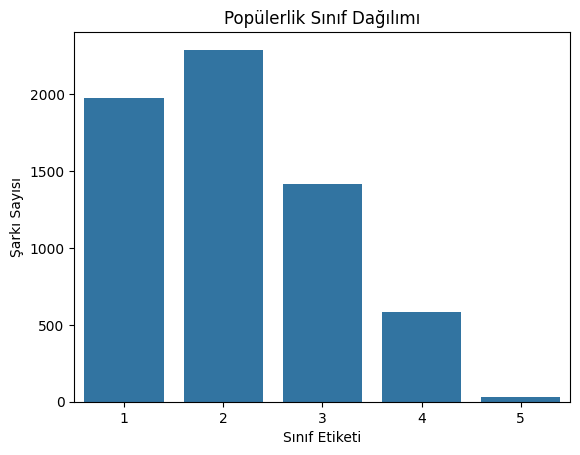

In [55]:
sns.countplot(x='popularity_label', data=df_class)
plt.title("Popülerlik Sınıf Dağılımı")
plt.xlabel("Sınıf Etiketi")
plt.ylabel("Şarkı Sayısı")
plt.show()

**Model Eğitme**

In [56]:
X = df_class.drop(['popularity', 'popularity_label'], axis=1)
y = df_class['popularity_label']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [58]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[250 119  21   6   0]
 [115 260  75   7   1]
 [ 26 123 105  29   1]
 [  9  28  38  40   1]
 [  0   3   1   1   1]]
              precision    recall  f1-score   support

           1       0.62      0.63      0.63       396
           2       0.49      0.57      0.52       458
           3       0.44      0.37      0.40       284
           4       0.48      0.34      0.40       116
           5       0.25      0.17      0.20         6

    accuracy                           0.52      1260
   macro avg       0.46      0.42      0.43      1260
weighted avg       0.52      0.52      0.52      1260



In [59]:
!pip install imbalanced-learn

In [60]:
# SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Önce:", Counter(y_train))
print("Sonra:", Counter(y_train_resampled))

Önce: Counter({2: 1832, 1: 1583, 3: 1135, 4: 467, 5: 23})
Sonra: Counter({1: 1832, 3: 1832, 2: 1832, 4: 1832, 5: 1832})


In [61]:
# SMOTE Uygulanmış 'RandomForest','XGBoost','CatBoost','LightGBM'

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_state=42)
lgb_model = LGBMClassifier(random_state=42)

In [62]:
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Modeli eğit
    model.fit(X_train, y_train)
    # Test seti üzerinde tahmin yap
    y_pred = model.predict(X_test)

    # Performans metriklerini hesapla
    acc = accuracy_score(y_test, y_pred)
    print(f"----- {model_name} Sonuçları -----")
    print(f"Accuracy: {acc:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "~"*80 + "\n")

In [63]:
# SMOTE Uygulanmış Modellerin Sonuçları

train_and_evaluate_model(rf_model, "Random Forest", X_train_resampled, y_train_resampled - 1, X_test, y_test - 1)
train_and_evaluate_model(xgb_model, "XGBoost", X_train_resampled, y_train_resampled - 1, X_test, y_test - 1)
train_and_evaluate_model(cat_model, "CatBoost", X_train_resampled, y_train_resampled - 1, X_test, y_test - 1)
train_and_evaluate_model(lgb_model, "LightGBM", X_train_resampled, y_train_resampled - 1, X_test, y_test - 1)

----- Random Forest Sonuçları -----
Accuracy: 0.4992
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       396
           1       0.47      0.49      0.48       458
           2       0.41      0.37      0.39       284
           3       0.41      0.40      0.40       116
           4       0.33      0.33      0.33         6

    accuracy                           0.50      1260
   macro avg       0.45      0.44      0.45      1260
weighted avg       0.50      0.50      0.50      1260

Confusion Matrix:
[[251 116  21   8   0]
 [123 225  95  14   1]
 [ 27 106 105  44   2]
 [ 10  25  34  46   1]
 [  0   2   1   1   2]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:50:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


----- XGBoost Sonuçları -----
Accuracy: 0.5381
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       396
           1       0.55      0.55      0.55       458
           2       0.44      0.41      0.43       284
           3       0.40      0.42      0.41       116
           4       0.25      0.17      0.20         6

    accuracy                           0.54      1260
   macro avg       0.46      0.44      0.45      1260
weighted avg       0.54      0.54      0.54      1260

Confusion Matrix:
[[260  99  28   9   0]
 [114 251  76  16   1]
 [ 30  91 117  45   1]
 [  7  16  43  49   1]
 [  1   2   0   2   1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

----- CatBoost Sonuçları -----
Accuracy: 0.5230
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       396
           1       0.53      0.51      0.52 

In [64]:
# Kombine over + under sampling
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

print("Orijinal Dağılım:", Counter(y_train))
print("Yeni Dağılım:", Counter(y_resampled))

Orijinal Dağılım: Counter({2: 1832, 1: 1583, 3: 1135, 4: 467, 5: 23})
Yeni Dağılım: Counter({5: 1820, 4: 1681, 3: 1472, 1: 1458, 2: 1375})


In [65]:
# En İyi Parametrelerle XGBoost

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_clf = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_resampled, y_resampled - 1)

print("En iyi parametreler:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
En iyi parametreler: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [66]:
best_xgb_model = XGBClassifier(**random_search.best_params_, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_model(best_xgb_model, "Optimized XGBoost", X_resampled, y_resampled - 1, X_test, y_test - 1)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


----- Optimized XGBoost Sonuçları -----
Accuracy: 0.5159
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       396
           1       0.54      0.52      0.53       458
           2       0.41      0.38      0.40       284
           3       0.36      0.43      0.39       116
           4       0.33      0.33      0.33         6

    accuracy                           0.52      1260
   macro avg       0.45      0.46      0.46      1260
weighted avg       0.52      0.52      0.52      1260

Confusion Matrix:
[[251  97  30  18   0]
 [117 238  84  19   0]
 [ 36  90 109  48   1]
 [  8  15  40  50   3]
 [  0   1   0   3   2]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



| Model             | Accuracy   | Macro F1 | Weighted F1 | Notlar                                                     |
| ----------------- | ---------- | -------- | ----------- | ---------------------------------------------------------- |
| Random Forest     | 0.4992     | 0.45     | 0.50        | Sınıf 1 iyi ama sınıf 2 ve 3'te zorlanıyor.                |
| XGBoost           | **0.5381** | 0.45     | **0.54**    | En yüksek doğruluk ve ağırlıklı f1 puanı.                  |
| CatBoost          | 0.5230     | 0.44     | 0.52        | Dengeli ama çok farklı değil.                              |
| LightGBM          | 0.5278     | **0.46** | 0.53        | Macro F1 iyi, ama sınıf 2 için zayıf.                      |
| Optimized XGBoost | 0.5159     | 0.46     | 0.52        | Parametre aramasına rağmen base modelden düşük performans. |


# **🎻​ 8. Benzer Niteliklere Göre Şarkı Öneri Sistemi**

In [67]:
# 'spotify_tracks' veri setinin orijinal halini farklı bir DataFrame olarak ekledik.
path2 = "/content/drive/MyDrive/Dataset/spotify_tracks (1).csv"
df_suggest = pd.read_csv(path2)

In [68]:
df_suggest.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [69]:
df.head()

,popularity,artist_count,album_freq,duration_min,genre_popularity,explicit_encoded,main_artist_encoded
0,58.0,-0.435948,-0.429092,-0.339946,26.28,0,0.000635
1,57.0,-0.435948,-0.429092,-0.339905,26.28,0,0.000635
2,42.0,0.811881,-0.429092,-0.718811,26.28,0,0.000159
3,46.0,-0.435948,-0.429092,-1.108733,26.28,0,0.000159
4,33.0,0.811881,-0.429092,-0.868959,26.28,0,0.000317


In [70]:
# İki veri setinde de 'popularity' sütunu aynı olduğu için birinden kurtulduk.
df_suggest.drop(columns='popularity', axis=1, inplace= True)

In [71]:
df_suggest.head()

,id,name,genre,artists,album,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),133922,False


In [72]:
# İki Veri Setini Birleştirelim
df_combined = pd.concat([df_suggest.reset_index(drop=True), df.reset_index(drop=True)], axis=1)

In [73]:
df_combined.head()

,id,name,genre,artists,album,duration_ms,explicit,popularity,artist_count,album_freq,duration_min,genre_popularity,explicit_encoded,main_artist_encoded
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,172199,False,58.0,-0.435948,-0.429092,-0.339946,26.28,0,0.000635
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,172202,False,57.0,-0.435948,-0.429092,-0.339905,26.28,0,0.000635
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),144786,False,42.0,0.811881,-0.429092,-0.718811,26.28,0,0.000159
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,116573,False,46.0,-0.435948,-0.429092,-1.108733,26.28,0,0.000159
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),133922,False,33.0,0.811881,-0.429092,-0.868959,26.28,0,0.000317


In [74]:
# 'explicit' Sütunundan da 2 adet olduğu için birinden yine kurtulduk.
df_combined.drop(columns='explicit', axis=1, inplace= True)

In [75]:
df_combined.head()

,id,name,genre,artists,album,duration_ms,popularity,artist_count,album_freq,duration_min,genre_popularity,explicit_encoded,main_artist_encoded
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,172199,58.0,-0.435948,-0.429092,-0.339946,26.28,0,0.000635
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,172202,57.0,-0.435948,-0.429092,-0.339905,26.28,0,0.000635
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),144786,42.0,0.811881,-0.429092,-0.718811,26.28,0,0.000159
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,116573,46.0,-0.435948,-0.429092,-1.108733,26.28,0,0.000159
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),133922,33.0,0.811881,-0.429092,-0.868959,26.28,0,0.000317


In [76]:
# Öneri sisteminde faydalanılacak olan önemli sütunları belirledik.
feature_cols = ['artist_count', 'album_freq', 'duration_min', 'genre_popularity',
                'explicit_encoded', 'main_artist_encoded']
features = df_combined[feature_cols]


In [77]:
# Belirlenen featuresler için benzerlik matrisi uyguladık.
similarity_matrix = cosine_similarity(features)

In [78]:
# Verilen 'İndexe' Göre Öneride Bulunan Fonksiyon

def recommend_songs(song_index, top_n=5):
    sim_scores = list(enumerate(similarity_matrix[song_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # kendisi hariç

    recommended_indices = [i[0] for i in sim_scores]
    return df_combined[['name', 'artists', 'genre', 'popularity']].iloc[recommended_indices]


In [79]:
# İndex'e Göre Öneri
recommend_songs(113)

,name,artists,genre,popularity
114,M.S.S,Red,alt-rock,33.0
3476,Latin,Franklin Cumberland,latin,5.0
2119,Casita,Goth Babe,goth,54.0
4211,Kailangan Kita,Leah Navarro,philippines-opm,30.0
2100,Goth,Sidewalks and Skeletons,goth,68.0


In [80]:
# Verilen 'Şarkı İsmine' Göre Öneride Bulunan Fonksiyon

def recommend_songs_by_name(song_name, top_n=5):
    # Şarkının index'ini bul
    try:
        song_index = df_combined[df_combined['name'] == song_name].index[0]
    except IndexError:
        return f"'{song_name}' isminde bir şarkı bulunamadı."

    # Cosine similarity üzerinden benzerlikleri hesapla
    sim_scores = list(enumerate(similarity_matrix[song_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Kendisi hariç ilk N öneri
    recommended_indices = [i[0] for i in sim_scores]

    # Sonuçları döndür
    return df_combined[['name', 'artists', 'genre', 'popularity']].iloc[recommended_indices]

In [81]:
# Şarkı İsmine Göre Öneri
recommend_songs_by_name('Starboy')


,name,artists,genre,popularity
3222,Mr. Jones (feat. Future),"Pop Smoke, Future",j-pop,44.0
3774,Unholy,"Stain the Canvas, Wow That's What I Call Metal...",metalcore,29.0
757,Children of the Korn (feat. Ice Cube),"Korn, Ice Cube",children,50.0
5952,Tango: Maureen,"Tracie Thoms, Anthony Rapp",tango,40.0
1361,Disney,"LUNA KI, Babi",disney,38.0


**🎯 Öneri Sistemi Neye Göre Çalışıyor?**

Bu öneri sistemi Spotify'da akıllı mix mantığıyla benzer şekilde "içerik tabanlı filtreleme yöntemini kullanıyor.

**Yani:**
Seçilen bir şarkının özelliklerine benzeyen diğer şarkıları öneriyor.

**📦 Hangi Özelliklere Göre Benzerlik Ölçülüyor?**

- **artist_count:** Şarkıda yer alan sanatçı sayısı
- **album_freq:** Albümdeki şarkıların adeti
- **duration_min:** Şarkının süresi
- **genre_popularity:** O türdeki şarkıların ortalama popülerliği
- **explicit_encoded:** Şarkının sansür içerip içermediği (0 = değil, 1 = evet)
-**main_artist_encoded:** Ana sanatçının sayısal temsili



**📊 Benzerlik Nasıl Ölçülüyor?**
- Seçilen şarkının vektörü ile diğer tüm şarkıların vektörleri arasındaki cosine similarity (açısal benzerlik) hesaplanıyor.
- Özetle sistem şarkının özelliklerine (içeriğine) bakıyor, bu özellikleri vektör haline getiriyor, sonra diğer tüm şarkılarla bu vektörün benzerliğini ölçüyor ve en benzer olanları kullanıcıya öneriyor.

**⚙️ ​Örnek Çalışma Sistemi:**
- Örneğin kullanıcı *Billy Raffoul'un Acoustic* bir şarkısını seçti diyelim.
Sistem, aşağıdakilere benzer şarkılar önerir:

  - Süresi yakın (örneğin 3 dk civarı)

  - Aynı ya da benzer sayıda sanatçı içeriyor

  - Explicit değilse, o da değil

  - Aynı türde (acoustic) şarkılar aynı genre_popularity değerine sahip.

  - Benzer popülerlikte/albümlerden gelen şarkıları önerir.

#  **🎓 9.   Proje Kapanış ve Değerlendirme Raporu**

Bu proje kapsamında, müzik sektörüne yönelik bir veri seti üzerinde çalışarak, şarkıların popülerliklerini tahmin etmeye ve bu doğrultuda bir öneri sistemi geliştirmeye odaklandık. Projemizi aşağıdaki adımlar doğrultusunda yapılandırdık:


📌 **Veri Setinin Hikayesi**

Projemizin temelini, Spotify platformunda yer alan şarkılara ait bilgileri içeren bir veri seti oluşturdu. Her bir gözlem; şarkının adı, sanatçısı, türü, süresi, explicit (sansürlü içerik) olup olmaması gibi nitelikleri barındırmakta ve hedef değişken olarak da popülerlik skorunu içermekteydi.

**🔍 1. Veri Keşfi ve Ön İşleme**

Çalışmamızın ilk adımında veri setimizi derinlemesine inceledik. Eksik veya aykırı değerleri analiz ettik.Sayısal ve kategorik değişkenleri ayırarak daha sonra yapılacak işlemler için sağlam bir temel oluşturduk.

**🎼 2. Popülerlik Analizi: Türler, Albümler ve İçerik Yapısına Göre Top 3**

Veri setindeki farklı şarkı türleri, albümler ve explicit içeriklere göre şarkıların ortalama popülerliklerini karşılaştırarak popülerlik üzerinde etkili olan yapısal örüntüleri belirlemeye çalıştık. Özellikle tür bazlı analizler, şarkıların hedef kitleleriyle olan etkileşimleri hakkında fikir verdi.

**🛠️ 3. Feature Engineering (Özellik Mühendisliği)**

Modelin öğrenme kapasitesini artırmak amacıyla bazı yeni değişkenler oluşturduk. Örneğin:

- ***artist_count:*** Şarkıda yer alan sanatçı sayısı

- ***duration_min:*** Sürenin dakika cinsinden yeniden düzenlenmesi

- ***genre_popularity:*** Türlere göre ortalama popülerlik skoru

gibi nitelikleri veri setine dahil ederek modelin daha fazla bilgiyle donanmasını sağladık.

**🔄 4. Encoding**

Kategorik değişkenleri makine öğrenmesi modellerinin anlayacağı hale getirmek için Label Encoding ve Frequency Encoding yöntemlerini kullandık. Özellikle sanatçı ve tür gibi metinsel veriler bu sayede modele dahil edilebilir hâle geldi.

**📏 5. Standartlaştırma**

Sayısal değişkenleri StandardScaler ile ölçeklendirerek, modelin her özelliğe eşit ağırlık vermesini sağladık. Bu adım özellikle mesafe tabanlı algoritmalar ve regresyon modelleri için önemliydi.

**📈 6. Model Kurma (Regresyon)**

Ana modelimiz olarak çoklu doğrusal regresyon modellerini eğittik. Şarkıların popülerlik skorlarını tahmin etmeye çalıştık. Bazı özellik mühendisliği adımlarına rağmen, modelimizin doğruluk metrikleri beklediğimizin altında kaldı. Bu durum, veri setimizin sınırlı sütun sayısına ve hedef değişkenin doğası gereği yüksek varyans göstermesine bağlanabilir.

**⚖️ 7. Sınıflandırma Problemi (Opsiyonel)**

Regresyon modelinden sonra, problemimizi alternatif olarak sınıflandırma problemi olarak da ele aldık. Belirli bir popülerlik seviyesi olarak beş sınıfa ayırarak uyguladık. Bu yaklaşım, farklı bakış açıları geliştirmemize olanak sağladı ve model performansını sınıflandırma özelinde yeniden değerlendirme fırsatı sundu.

**🎧 8. Benzer Niteliklere Göre Şarkı Öneri Sistemi**

Çalışmamızın finalinde, elde ettiğimiz sayısal verilerle *içerik tabanlı* *(content-based)* bir öneri sistemi kurduk. Cosine similarity algoritmasını kullanarak, bir şarkıya benzer niteliklerde olan diğer şarkıları tespit edip kullanıcıya öneren bir sistem tasarladık. Bu sistem, veri biliminde kullanıcıya katma değer sağlayan pratik uygulamalar arasında yer almaktadır. Ayrıca bu yapı, projemizi sadece tahmin yapmaktan öteye taşıyarak kullanıcı etkileşimini destekleyen bir çözüme dönüştürdü.




# **✅ 10. SWOT Analizi – Ritmin Ardındaki Başarı: Spotify Şarkı Özellikleri ile Popülerlik Skorunun Öngörülmesi**

**💪​ Strengths (Güçlü Yönler)**

- Projenin başından sonuna kadar veri bilimi sürecinin tüm aşamalarını kapsaması (veri temizleme, özellik mühendisliği, modelleme, öneri sistemi).

- Hem regresyon hem sınıflandırma yaklaşımıyla probleme çok yönlü bakılması.

- İçerik tabanlı öneri sisteminin başarıyla kurulması ve Streamlit ile canlıya alınması.

- Modelin hem açıklanabilir hem de kullanıcıya fayda sağlayacak bir çıktısı olması (öneriler).

- Özellik mühendisliğiyle veriden maksimum bilgi çıkarılmaya çalışılması.


 **🩻​ Weaknesses (Zayıf Yönler)**

 - Veri setindeki sütun sayısının azlığı, modele giren bilgi miktarını sınırladı.

- Hedef değişken olan “popülerlik” çok faktörlü olduğundan dolayı tahmin zorluğu oluşturdu.

- Model doğruluk oranlarının beklentilerin altında kalması.

- Veride metinsel veya duygu analizi gibi derin bağlam içeren öğelerin olmaması.


**​⭐ ​Opportunities (Fırsatlar)**

- Veri seti daha fazla özellik (örneğin şarkı sözü analizi, sosyal medya etkileşimi, kullanıcı dinlenme verisi) ile zenginleştirilirse modelin başarısı ciddi şekilde artırılabilir.

- Proje, gerçek hayat uygulamalarına (örneğin müzik platformları, öneri motorları) kolaylıkla entegre edilebilecek bir yapıya sahip.

- Alternatif modelleme yaklaşımları (ensemble modeller, derin öğrenme gibi) ile geliştirilmeye açık.

- Sistem, kullanıcıya kişiselleştirilmiş öneri sunma konusunda geliştirilmeye uygun (kullanıcı geçmişi entegre edilirse).

**​⚠️ ​Threats (Tehditler)**

- Popülerlik gibi subjektif bir kavramın modellemesi her zaman dış faktörlerden etkilenir ve bu kontrol edilemezdir.

- Modelin genel geçer başarısı, üretim ortamında farklılık gösterebilir.

- İçerik tabanlı sistem, kullanıcıya yalnızca benzer şarkılar önerdiği için çeşitlilik eksikliği olabilir.

- Veri güncellenmezse model zamanla geçerliliğini kaybedebilir (örneğin, değişen müzik trendleri nedeniyle).

# **GRADIO**

In [82]:
# GRADIO
!pip install gradio

In [83]:
print(model.feature_names_in_)

['artist_count' 'album_freq' 'duration_min' 'genre_popularity'
 'explicit_encoded' 'main_artist_encoded']


In [84]:
import gradio as gr

In [85]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd # Ensure pandas is imported

def predict_popularity(artist, album, genre, explicit, duration_min):
    try:
        # 1. KONTROLLER
        required_model_features = ['artist_count', 'album_freq', 'duration_min',
                                 'genre_popularity', 'explicit_encoded', 'main_artist_encoded']

        # 2. GİRDİLERİ HAZIRLA
        input_data = {
            'artist_count': len(artist.split(',')),  # Sanatçı sayısı
            'album_freq': df_combined[df_combined['album'] == album]['album_freq'].mean() if album else 0.5,
            'duration_min': duration_min / 60,  # Saniyeden dakikaya çevir
            'genre_popularity': df_combined[df_combined['genre'] == genre]['genre_popularity'].mean(),
            'explicit_encoded': 1 if explicit == "Evet" else 0,
            'main_artist_encoded': df_combined[df_combined['artists'].str.contains(artist.split(',')[0])]['main_artist_encoded'].mean()
        }

        # 3. MODEL İÇİN VERİYİ DOĞRU SIRAYLA HAZIRLA
        input_df = pd.DataFrame([input_data])[required_model_features]

        # 4. SADECE SCALER'IN DÖNÜŞTÜREBİLECEĞİ ÖZELLİKLERİ SEÇ
        scaler_features = ['duration_min', 'artist_count', 'album_freq']
        # Check if scaler exists before transforming
        if 'scaler' in globals():
            input_scaled_part = scaler.transform(input_df[scaler_features])
        else:
            # Handle case where scaler is not defined (should not happen in typical workflow)
            print("Warning: 'scaler' not found. Skipping scaling for these features.")
            input_scaled_part = input_df[scaler_features].values


        # 5. SCALER UYGULANMIŞ VE UYGULANMAMIŞ ÖZELLİKLERİ BİRLEŞTİR
        input_scaled = np.column_stack([
            input_scaled_part,
            input_df[['genre_popularity', 'explicit_encoded', 'main_artist_encoded']].values
        ])

        # 6. TAHMİN YAP
        # Check if model exists before predicting
        if 'model' in globals():
            prediction = model.predict(input_scaled)[0]
            return f"✅ Tahmin: {max(0, min(100, prediction)):.1f}/100"
        else:
            return "❌ HATA: 'model' bulunamadı. Lütfen modelin yüklendiğinden emin olun."


    except Exception as e:
        error_msg = f"""
        ❌ HATA DETAYI:
        • Sebep: {str(e)}
        • Modelin beklediği sıra: {model.feature_names_in_ if 'model' in globals() and hasattr(model, 'feature_names_in_') else 'Bilinmiyor'}
        • Scaler'ın dönüştürdüğü özellikler: {scaler_features}
        • Girdi verisi: {input_data if 'input_data' in locals() else 'Oluşturulamadı'}
        """
        return error_msg

# Features for the recommender model (will be encoded)
features_for_recommendation = ['name', 'artists', 'album', 'genre']

# Create a copy for recommendation features and handle potential NaNs
df_recommendation_features = df_combined[features_for_recommendation].copy().fillna('')

# Encode categorical features for the recommender model
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Use sparse_output=False for a dense array
encoded_features = encoder.fit_transform(df_recommendation_features)

# Initialize and fit the recommender model
recommender = NearestNeighbors(n_neighbors=6, algorithm='auto')
recommender.fit(encoded_features)


def recommend_songs(song_name, n_recommendations=5):
    try:
        # Şarkıyı bul
        song_idx = df_combined[df_combined['name'] == song_name].index
        if len(song_idx) == 0:
            return pd.DataFrame({"Hata": ["Şarkı bulunamadı"]})

        # Get the encoded features for the selected song
        song_encoded = encoder.transform(df_combined.loc[song_idx, features_for_recommendation].fillna(''))


        # Benzer şarkıları bul
        distances, indices = recommender.kneighbors(
            song_encoded, # Use the encoded song features
            n_neighbors=n_recommendations+1
        )

        # Kendisini çıkar
        similar_songs = df_combined.iloc[indices[0][1:]]
        return similar_songs[['name', 'artists', 'album', 'genre', 'popularity']]

    except Exception as e:
        return pd.DataFrame({"Hata": [f"Öneri oluşturulamadı: {str(e)}"]})

# UI için yardımcı fonksiyonlar
def get_artist_albums(artist):
    albums = df_combined[df_combined["artists"] == artist]["album"].unique().tolist()
    return gr.Dropdown.update(choices=albums, value=albums[0] if albums else None)

def get_artist_genres(artist):
    genres = df_combined[df_combined["artists"] == artist]["genre"].unique().tolist()
    return gr.Dropdown.update(choices=genres, value=genres[0] if genres else None)

# Gradio Arayüzü
with gr.Blocks(title="🎵 Müzik Analiz ve Öneri Sistemi", theme=gr.themes.Soft(primary_hue="green",
    secondary_hue="orange",
    neutral_hue="zinc")) as demo:
    gr.Markdown("""
    # 🎧 Müzik Popülerlik Tahmini ve Öneri Sistemi
    *Sanatçı ve şarkı bilgilerini girerek popülerlik tahmini alabilir veya 'Şarkı Önerisi' kısmından benzer şarkı önerileri alabilirsiniz.*
    """)

    with gr.Tab("🎯 Popülerlik Tahmini"):
        with gr.Row():
            with gr.Column():
                artist = gr.Dropdown(
                    choices=df_combined["artists"].unique().tolist(),
                    label="Sanatçı",
                    interactive=True
                )
                album = gr.Dropdown(
                    choices=df_combined["album"].unique().tolist(),
                    label="Albüm",
                    interactive=True
                )
                genre = gr.Dropdown(
                    choices=df_combined["genre"].unique().tolist(),
                    label="Tür",
                    interactive=True
                )
                explicit = gr.Radio(
                    ["Evet", "Hayır"],
                    label="Explicit İçerik",
                    value="Hayır"
                )
                duration = gr.Slider(
                    60, 600,
                    value=180,
                    step=5,
                    label="Süre (saniye)",
                    interactive=True
                )
                predict_btn = gr.Button("Tahmin Et", variant="primary")

            with gr.Column():
                result = gr.Textbox(
                    label="Popülerlik Skoru",
                    interactive=False,
                    lines=6
                )




        artist.change(fn=get_artist_albums, inputs=artist, outputs=album)
        artist.change(fn=get_artist_genres, inputs=artist, outputs=genre)
        predict_btn.click(
            fn=predict_popularity,
            inputs=[artist, album, genre, explicit, duration],
            outputs=result
        )

    with gr.Tab("🎵 Şarkı Önerisi"):
        with gr.Row():
            with gr.Column():
                song = gr.Dropdown(
                    choices=df_combined["name"].unique().tolist(),
                    label="Şarkı Seç",
                    interactive=True
                )
                recommend_btn = gr.Button("Önerileri Getir", variant="primary")



            with gr.Column():
                output_table = gr.Dataframe(
                    label="Benzer Şarkılar",
                    headers=["Şarkı", "Sanatçı", "Albüm", "Tür", "Popülerlik"],
                    interactive=False
                )

        recommend_btn.click(
            fn=recommend_songs,
            inputs=song,
            outputs=output_table
        )

    # Footer
    gr.Markdown("""
    ---
    *Bu uygulama müzik verileri üzerinde makine öğrenmesi modelleri kullanmaktadır.*
    """)

# Uygulamayı başlat
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://19b37620bbcb9ce8c0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


temiz olan alttaki

In [86]:
def predict_popularity(artist, album, genre, explicit, duration_min):
    try:
        # 1. KONTROLLER
        required_model_features = ['artist_count', 'album_freq', 'duration_min',
                                 'genre_popularity', 'explicit_encoded', 'main_artist_encoded']

        # 2. GİRDİLERİ HAZIRLA
        input_data = {
            'artist_count': len(artist.split(',')),  # Sanatçı sayısı
            'album_freq': df_combined[df_combined['album'] == album]['album_freq'].mean() if album else 0.5,
            'duration_min': duration_min / 60,  # Saniyeden dakikaya çevir
            'genre_popularity': df_combined[df_combined['genre'] == genre]['genre_popularity'].mean(),
            'explicit_encoded': 1 if explicit == "Evet" else 0,
            'main_artist_encoded': df_combined[df_combined['artists'].str.contains(artist.split(',')[0])]['main_artist_encoded'].mean()
        }

        # 3. MODEL İÇİN VERİYİ DOĞRU SIRAYLA HAZIRLA
        input_df = pd.DataFrame([input_data])[required_model_features]

        # 4. SADECE SCALER'IN DÖNÜŞTÜREBİLECEĞİ ÖZELLİKLERİ SEÇ
        scaler_features = ['duration_min', 'artist_count', 'album_freq']
        input_scaled_part = scaler.transform(input_df[scaler_features])

        # 5. SCALER UYGULANMIŞ VE UYGULANMAMIŞ ÖZELLİKLERİ BİRLEŞTİR
        input_scaled = np.column_stack([
            input_scaled_part,
            input_df[['genre_popularity', 'explicit_encoded', 'main_artist_encoded']].values
        ])

        # 6. TAHMİN YAP
        prediction = model.predict(input_scaled)[0]
        return f"✅ Tahmin: {max(0, min(100, prediction)):.1f}/100"

    except Exception as e:
        error_msg = f"""
        ❌ HATA DETAYI:
        • Sebep: {str(e)}
        • Modelin beklediği sıra: {model.feature_names_in_}
        • Scaler'ın dönüştürdüğü özellikler: {scaler_features}
        • Girdi verisi: {input_data if 'input_data' in locals() else 'Oluşturulamadı'}
        """
        return error_msg

def recommend_songs(song_name, n_recommendations=5):
    try:
        # Şarkıyı bul
        song_idx = df_combined[df_combined['name'] == song_name].index
        if len(song_idx) == 0:
            return pd.DataFrame({"Hata": ["Şarkı bulunamadı"]})

        # Benzer şarkıları bul
        distances, indices = recommender.kneighbors(
            df_combined.loc[song_idx, features_for_recommendation],
            n_neighbors=n_recommendations+1
        )

        # Kendisini çıkar
        similar_songs = df_combined.iloc[indices[0][1:]]
        return similar_songs[['name', 'artists', 'album', 'genre', 'popularity']]

    except Exception as e:
        return pd.DataFrame({"Hata": [f"Öneri oluşturulamadı: {str(e)}"]})

# UI için yardımcı fonksiyonlar
def get_artist_albums(artist):
    albums = df_combined[df_combined["artists"] == artist]["album"].unique().tolist()
    return gr.Dropdown.update(choices=albums, value=albums[0] if albums else None)

def get_artist_genres(artist):
    genres = df_combined[df_combined["artists"] == artist]["genre"].unique().tolist()
    return gr.Dropdown.update(choices=genres, value=genres[0] if genres else None)

# Gradio Arayüzü
with gr.Blocks(title="🎵 Müzik Analiz ve Öneri Sistemi", theme=gr.themes.Soft(primary_hue="green",
    secondary_hue="orange",
    neutral_hue="zinc")) as demo:
    gr.Markdown("""
    # 🎧 Müzik Popülerlik Tahmini ve Öneri Sistemi
    *Sanatçı ve şarkı bilgilerini girerek popülerlik tahmini alabilir veya 'Şarkı Önerisi' kısmından benzer şarkı önerileri alabilirsiniz.*
    """)

    with gr.Tab("🎯 Popülerlik Tahmini"):
        with gr.Row():
            with gr.Column():
                artist = gr.Dropdown(
                    choices=df_combined["artists"].unique().tolist(),
                    label="Sanatçı",
                    interactive=True
                )
                album = gr.Dropdown(
                    choices=df_combined["album"].unique().tolist(),
                    label="Albüm",
                    interactive=True
                )
                genre = gr.Dropdown(
                    choices=df_combined["genre"].unique().tolist(),
                    label="Tür",
                    interactive=True
                )
                explicit = gr.Radio(
                    ["Evet", "Hayır"],
                    label="Explicit İçerik",
                    value="Hayır"
                )
                duration = gr.Slider(
                    60, 600,
                    value=180,
                    step=5,
                    label="Süre (saniye)",
                    interactive=True
                )
                predict_btn = gr.Button("Tahmin Et", variant="primary")

            with gr.Column():
                result = gr.Textbox(
                    label="Popülerlik Skoru",
                    interactive=False,
                    lines=6
                )




        artist.change(fn=get_artist_albums, inputs=artist, outputs=album)
        artist.change(fn=get_artist_genres, inputs=artist, outputs=genre)
        predict_btn.click(
            fn=predict_popularity,
            inputs=[artist, album, genre, explicit, duration],
            outputs=result
        )

    with gr.Tab("🎵 Şarkı Önerisi"):
        with gr.Row():
            with gr.Column():
                song = gr.Dropdown(
                    choices=df_combined["name"].unique().tolist(),
                    label="Şarkı Seç",
                    interactive=True
                )
                recommend_btn = gr.Button("Önerileri Getir", variant="primary")



            with gr.Column():
                output_table = gr.Dataframe(
                    label="Benzer Şarkılar",
                    headers=["Şarkı", "Sanatçı", "Albüm", "Tür", "Popülerlik"],
                    interactive=False
                )

        recommend_btn.click(
            fn=recommend_songs,
            inputs=song,
            outputs=output_table
        )

    # Footer
    gr.Markdown("""
    ---
    *Bu uygulama müzik verileri üzerinde makine öğrenmesi modelleri kullanmaktadır.*
    """)

# Uygulamayı başlat
demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e5cabe05ba0e34a39f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
